# Example : Tracking Component Life
This script tracks the wear pattern of different designs for the component. Normally this would be done over a larger population. The data gets dumped in a central database everynight and the report is generated and reviewed weekly until the part reaches a certain limit of hours.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pyodbc as db
import numpy as np

In [69]:
data_set = pd.read_csv('wear_data.csv')

In [70]:
data_set.drop(0,inplace=True)

In [114]:
data_set

,Hours,A_EI,A_EO,A_II,A_IO,B_EI,B_EO,B_II,B_IO
1,778.0,0.24,0.10,0.04,0.07,0.32,0.08,0.04,0.08
2,2141.0,0.25,0.10,0.08,0.11,0.30,0.07,0.05,0.09
3,3756.0,0.23,0.11,0.08,0.11,0.30,0.12,0.04,0.08
4,5266.0,0.25,0.10,0.08,0.11,0.34,0.10,0.04,0.08
5,6726.0,0.33,0.13,0.08,0.15,0.37,0.10,0.03,0.08
6,8261.0,0.32,0.13,0.06,0.14,0.49,0.10,0.06,0.10
7,9734.0,0.30,0.16,0.11,0.13,0.63,0.07,0.04,0.09
8,11255.0,0.31,0.15,0.08,0.13,0.63,0.08,0.04,0.09
9,12650.0,0.31,0.15,0.08,0.10,0.63,0.08,0.04,0.09


In [112]:
cutoff_wear = 0.1
wear_rate = pd.DataFrame(index=['RATE','EXPECTED_LIFE'])
for i in data_set.columns[1:]:
    wear_rate.insert(len(wear_rate.columns),i,np.polyfit(data_set['Hours'].values,data_set[i].values,1)[0])
wear_rate.ix['EXPECTED_LIFE'] = cutoff_wear/wear_rate.ix['RATE']



In [113]:
wear_rate

,A_EI,A_EO,A_II,A_IO,B_EI,B_EO,B_II,B_IO
RATE,0.000007,0.000005,0.000002,0.000003,0.000034,-7.578215e-07,-1.132999e-07,8.874453e-07
EXPECTED_LIFE,13398.181244,18696.960541,45153.481198,35806.319520,2951.988795,-1.319572e+05,-8.826136e+05,1.126830e+05


In [56]:
plt.style.use('ggplot')


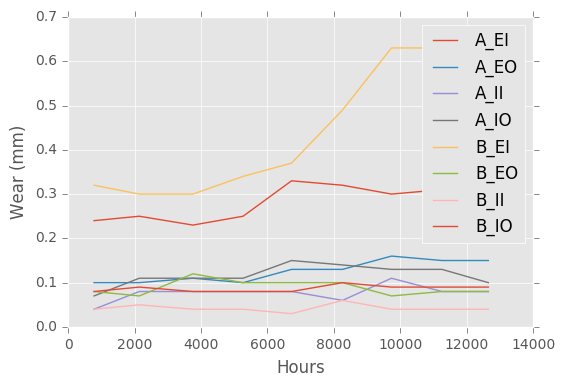

In [125]:
for i in data_set.columns[1:]:
    plt.plot(data_set['Hours'].values,data_set[i].values)
plt.legend(data_set.columns[1:])
plt.xlabel('Hours')
plt.ylabel('Wear (mm)')


